## 1. В сводной таблице представить данные за март и апрель по двум юнитам с разбивкой по юнитам, назначению, мастерам. 

In [1]:
import pandas as pd
import os

# Загрузка данных
file_path_xlsx = './Case/Тестовой_задание_Финансовый_аналитик.xlsx'
all_sheets = pd.read_excel(file_path_xlsx, sheet_name=None)

# Предварительная обработка и комбинирование данных
combined_data = pd.concat([
    all_sheets['Database Unit 1'],
    all_sheets['Database Unit 2']
], keys=['Unit 1', 'Unit 2'])

# Приведение дат к типу datetime и фильтрация за март и апрель
combined_data['Дата'] = pd.to_datetime(combined_data['Дата'])
mask = (combined_data['Дата'].dt.month == 3) | (combined_data['Дата'].dt.month == 4)
filtered_data = combined_data[mask]

print("Первые строки отфильтрованных данных:")
print(filtered_data.head())

# Создание сводной таблицы
pivot_table = pd.pivot_table(
    filtered_data,
    # values='Сумма, €',
    index=['Дата', 'Мастер', 'Назначение'],
    columns=filtered_data.index.get_level_values(0),
    aggfunc='sum',
    fill_value=0
)

print("Сводная таблица:")
print(pivot_table)

# Сортировка данных по дате
sorted_data = filtered_data.sort_values(by='Дата')

output_path = './Solution_data/1/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Экспорт сводной таблицы в Excel
export_file_path = './Solution_data/1/1_ex_Data_by_Unit_with_sum.xlsx'
with pd.ExcelWriter(export_file_path) as writer:
    for unit in ['Unit 1', 'Unit 2']:
        unit_data = sorted_data[filtered_data.index.get_level_values(0) == unit]
        # Создаем сводную таблицу для каждого юнита
        unit_pivot_table = pd.pivot_table(
            unit_data,
            values='Сумма, €',
            index=['Дата', 'Мастер', 'Назначение'],
            aggfunc='sum',
            fill_value=0
        )
        unit_pivot_table.to_excel(writer, sheet_name=unit)

print("Сводная таблица успешно экспортирована.")

Первые строки отфильтрованных данных:
                          Дата  № документа      Назначение           Касса  \
Unit 1 283 2024-03-31 15:00:00    609011318  Оказание услуг  Расчетный счет   
       284 2024-03-31 12:45:00    609269289  Оказание услуг  Расчетный счет   
Unit 2 180 2024-03-31 19:15:00    609492261  Оказание услуг  Расчетный счет   
       181 2024-03-31 19:15:00    609492261  Оказание услуг  Расчетный счет   
       182 2024-03-31 11:20:00    607016428  Оказание услуг  Расчетный счет   

               Мастер  Сумма, €  
Unit 1 283  Yuliia S.     100.0  
       284  Yuliia S.     150.0  
Unit 2 180     Tamara      75.0  
       181     Tamara      15.0  
       182     Tamara     200.0  
Сводная таблица:
                                                Касса                  \
                                               Unit 1          Unit 2   
Дата                Мастер      Назначение                              
2024-03-01 12:00:00 Jevgenia D  Оказание услуг 

In [2]:
# Экспорт данных в Excel без агрегации
export_file_path = './Solution_data/1/1_ex_Data_by_Unit_without_sum.xlsx'
with pd.ExcelWriter(export_file_path) as writer:
    for unit, data in sorted_data.groupby(level=0):
        # Формирование данных для каждого юнита и сохранение в отдельный лист Excel
        unit_data = data.reset_index(level=0, drop=True)  # Удаление уровня индекса юнита
        # Только данные за март и апрель, разбитые по 'Дата', 'Мастер', 'Назначение'
        unit_data[['Дата', 'Мастер', 'Назначение']].to_excel(writer, sheet_name=unit, index=False)

print("Данные успешно экспортированы в Excel без номеров строк.")

Данные успешно экспортированы в Excel без номеров строк.


## 2. Подготовить макет дашборда с целью быстрого анализа, на какую сумму были произведены услуги через кассу/расчетный счет в марте и апреле.

In [3]:
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc

# Загрузка и подготовка данных
file_path_xlsx = './Case/Тестовой_задание_Финансовый_аналитик.xlsx'
all_sheets = pd.read_excel(file_path_xlsx, sheet_name=None)

combined_data = pd.concat(all_sheets.values(), ignore_index=True)
combined_data['Дата'] = pd.to_datetime(combined_data['Дата'])
combined_data = combined_data[(combined_data['Дата'].dt.month == 3) | (combined_data['Дата'].dt.month == 4)]
combined_data['Месяц'] = combined_data['Дата'].dt.strftime('%B')

# Подготовка данных для визуализации
pivot_data = combined_data.pivot_table(values='Сумма, €', index='Месяц', columns='Касса', aggfunc='sum')

# Создание графика
fig = px.bar(pivot_data, title="Сумма услуг по способам оплаты в марте и апреле")

# Создание Dash-приложения
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Анализ суммы услуг через кассу и расчетный счет"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

## 3. Подготовить предложение отчета, где будут собираться данные по месяцам (также будущим месяцам при загрузки данных в том же формате) с разбивкой продаж по периодам, мастерам, назначению, способу получения средств от продаж.

In [4]:
import pandas as pd
import os

# Загрузка данных
file_path_xlsx = './Case/Тестовой_задание_Финансовый_аналитик.xlsx'
all_sheets = pd.read_excel(file_path_xlsx, sheet_name=None)

# Объединение данных из всех нужных листов
combined_data = pd.concat(all_sheets.values(), ignore_index=True)

# Преобразование столбца даты
combined_data['Дата'] = pd.to_datetime(combined_data['Дата'], errors='coerce')
if 'Дата' not in combined_data.columns:
    raise ValueError("Столбец 'Дата' отсутствует в данных")

# Создание колонки "Период" с форматом интервала
combined_data['Период'] = combined_data['Дата'].dt.to_period('M').apply(
    lambda x: f"{x.start_time.strftime('%d-%m-%Y')} to {x.end_time.strftime('%d-%m-%Y')}" if pd.notna(x) else None
)

# Группировка данных
grouped_data = combined_data.groupby(['Период', 'Мастер', 'Назначение', 'Касса']).size().reset_index(name='Количество')

# Сортировка данных
sorted_data = grouped_data.sort_values(['Период', 'Мастер', 'Назначение', 'Касса'])

output_path = './Solution_data/3/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Экспорт в Excel с форматированием
output_path = './Solution_data/3/Monthly_Sales_Report.xlsx'
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    start_row = 1  # Начинаем с первой строки (не с заголовков)
    worksheet = writer.book.add_worksheet('Sales Breakdown')
    writer.sheets['Sales Breakdown'] = worksheet
    
    # Устанавливаем ширины столбцов
    worksheet.set_column('A:A', 30)
    worksheet.set_column('B:B', 20)
    worksheet.set_column('C:C', 20)
    worksheet.set_column('D:D', 20)
    worksheet.set_column('E:E', 10)

    # Записываем заголовки
    header_format = writer.book.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
    worksheet.write_row(0, 0, ['Период', 'Мастер', 'Назначение', 'Касса', 'Количество'], header_format)    

    # Записываем данные
    period_start_row = start_row
    last_period = None
    for idx, row in sorted_data.iterrows():
        if row['Период'] != last_period:
            if last_period is not None:
                # Объединяем ячейки для предыдущего периода
                worksheet.merge_range(f'A{period_start_row}:A{start_row}', last_period, header_format)
            period_start_row = start_row + 1
            last_period = row['Период']
        worksheet.write_row(start_row, 1, row[1:])  # Начинаем с колонки B
        start_row += 1
    # Объединяем ячейки для последнего периода
    worksheet.merge_range(f'A{period_start_row}:A{start_row}', last_period, header_format)

    
print("Отчёт успешно сохранён и отформатирован:", output_path)


Отчёт успешно сохранён и отформатирован: ./Solution_data/3/Monthly_Sales_Report.xlsx


## 4. Графически представить изменение уровня продаж за период с января по апрель.

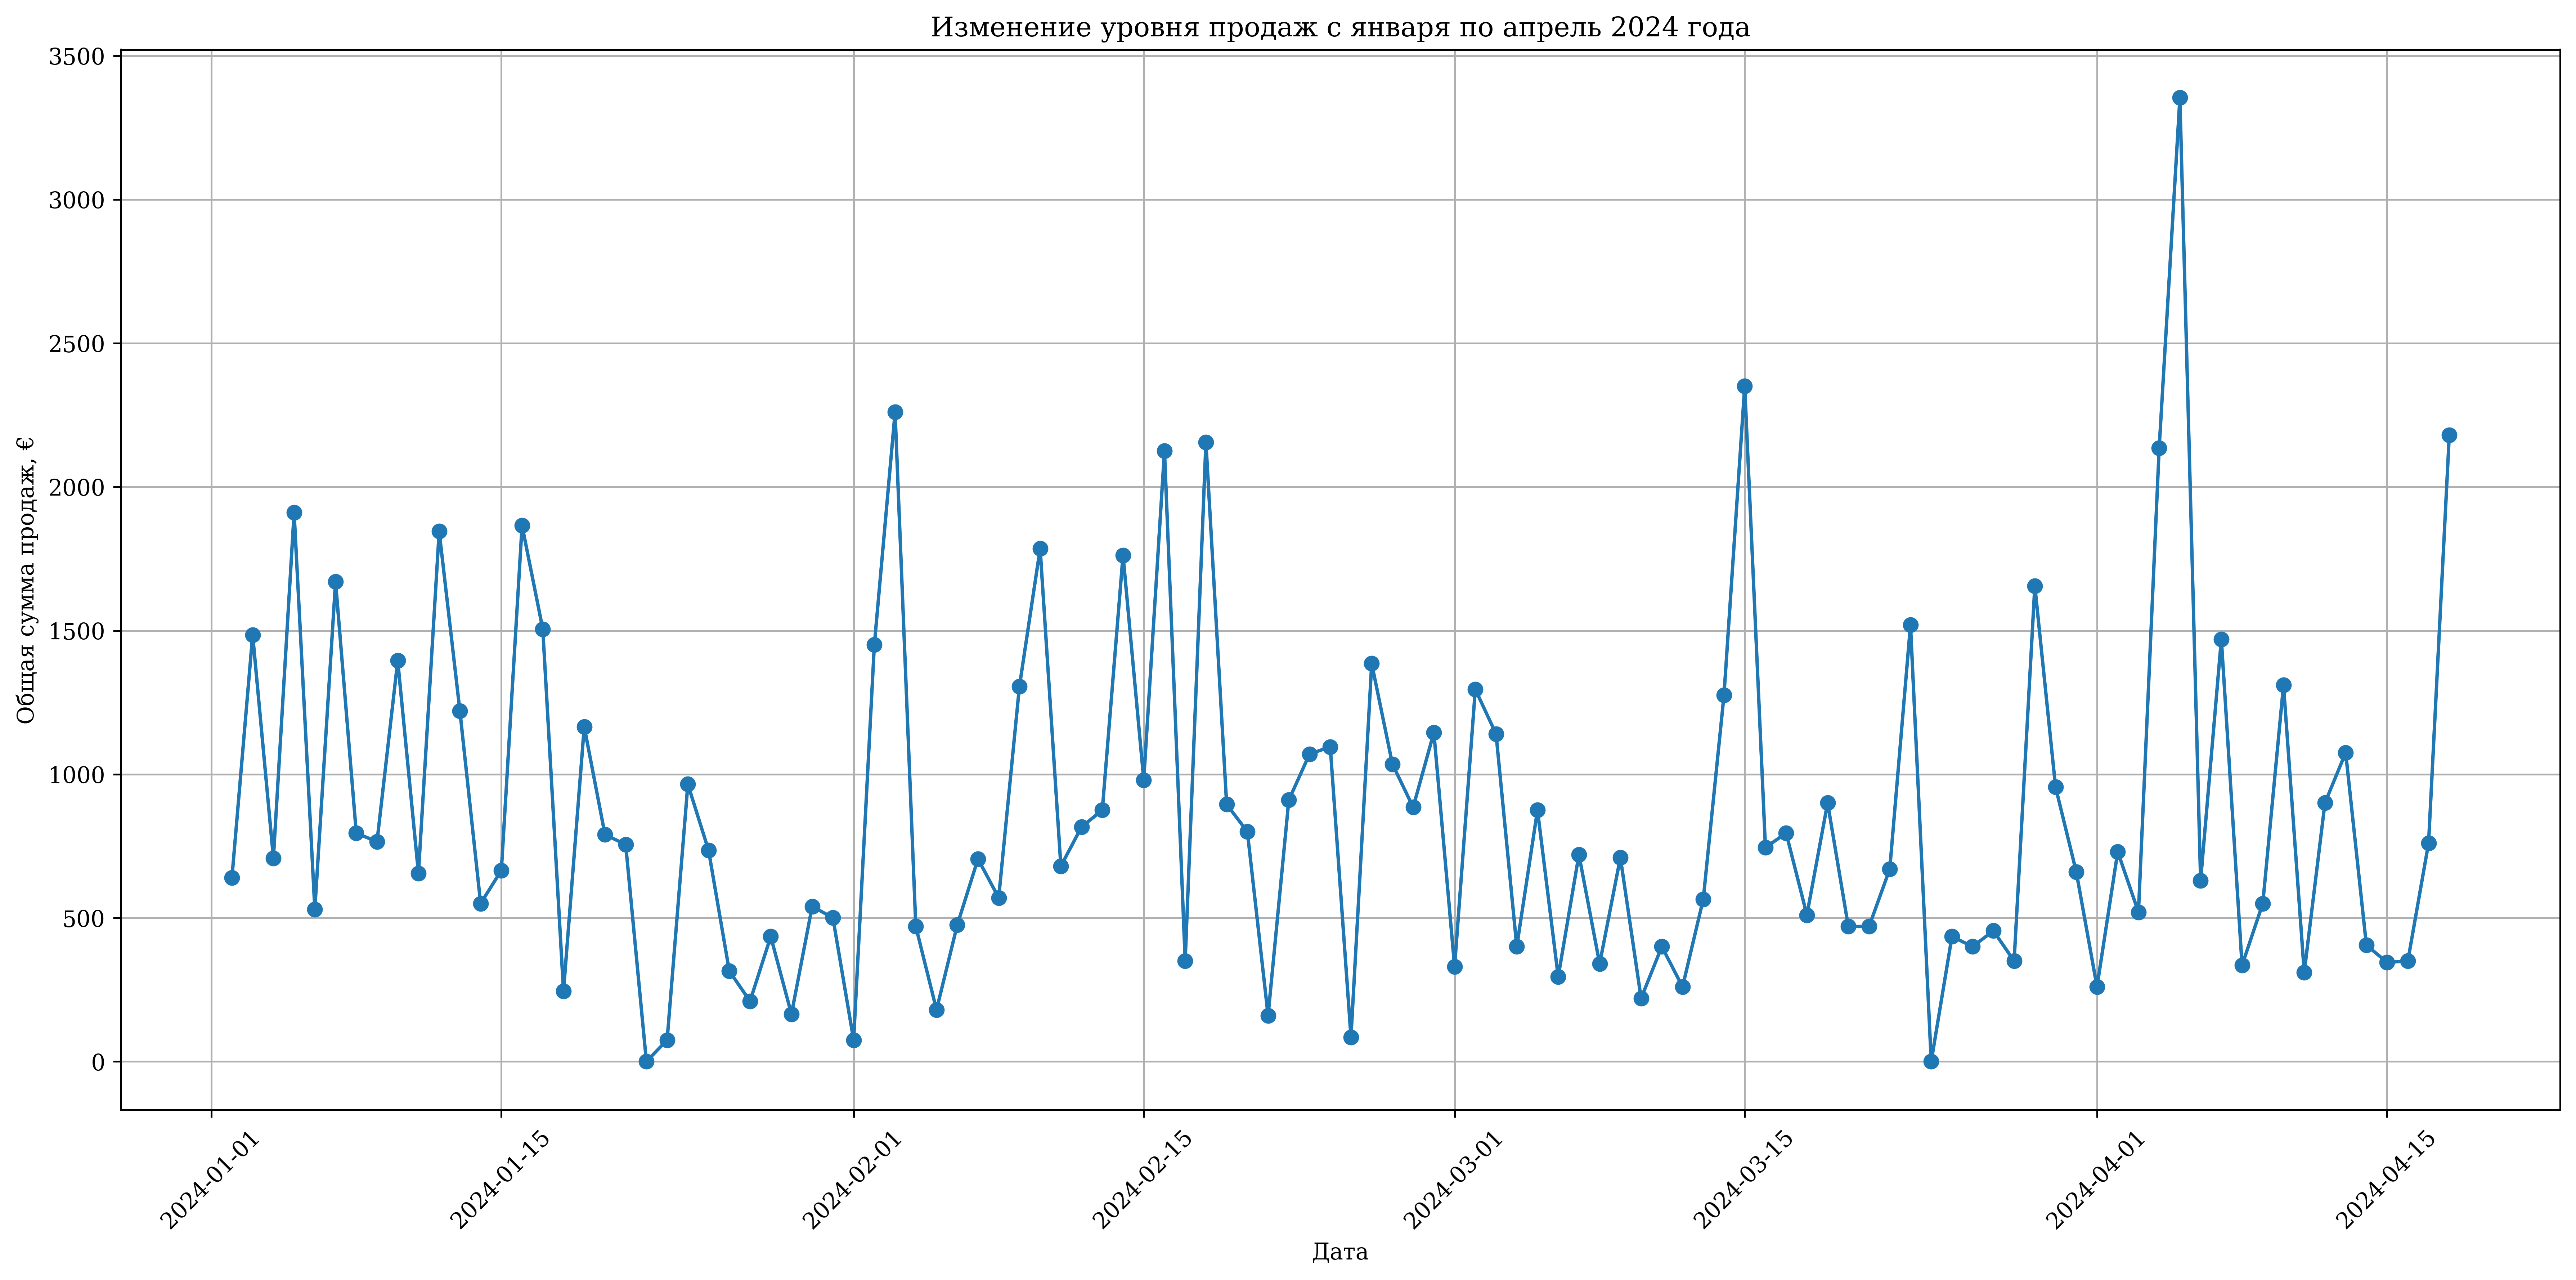

In [5]:
# В виде графика

import pandas as pd
import matplotlib.pyplot as plt
import os

# Загрузка данных
file_path_xlsx = './Case/Тестовой_задание_Финансовый_аналитик.xlsx'
all_sheets = pd.read_excel(file_path_xlsx, sheet_name=None)

# Предварительная обработка и комбинирование данных
combined_data = pd.concat([
    all_sheets['Database Unit 1'],
    all_sheets['Database Unit 2']
], keys=['Unit 1', 'Unit 2'])

# Фильтрация данных с января по апрель
combined_data['Дата'] = pd.to_datetime(combined_data['Дата'])
mask = (combined_data['Дата'].dt.month >= 1) & (combined_data['Дата'].dt.month <= 4)
filtered_data = combined_data[mask]

# Убедимся, что дата уже в правильном формате и установлена как индекс
filtered_data['Дата'] = pd.to_datetime(filtered_data['Дата'])
filtered_data.set_index('Дата', inplace=True)

# Фильтруем данные за нужный период
mask = (filtered_data.index >= '2024-01-01') & (filtered_data.index <= '2024-04-30')
filtered_data = filtered_data.loc[mask]

# Суммирование продаж по дням
daily_sales = filtered_data.resample('D').sum()  # Используем 'D' для суммирования по дням

output_path = './Solution_data/4/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Создание графика
plt.figure(figsize=(16, 8), dpi=450)
plt.rc('font', family='serif')
plt.plot(daily_sales.index, daily_sales['Сумма, €'], marker='o', linestyle='-')  
plt.title('Изменение уровня продаж с января по апрель 2024 года')  
plt.xlabel('Дата')  
plt.ylabel('Общая сумма продаж, €')  
plt.grid(True)  
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.savefig(os.path.join(output_path, 'Daily_Sales_Chart.png'))

plt.show()

In [6]:
# В виде дашборда

import dash
from dash import dcc, html
import plotly.express as px

# Фильтруем данные за нужный период
mask = (filtered_data.index >= '2024-01-01') & (filtered_data.index <= '2024-04-30')
filtered_data = filtered_data.loc[mask]

# Суммирование продаж по дням
daily_sales = filtered_data.resample('D').sum()

# Создание графика
fig_ex4 = px.line(daily_sales, y='Сумма, €', title='Изменение уровня продаж с января по апрель 2024 года',
              labels={'Сумма, €': 'Общая сумма продаж', 'index': 'Дата'})

# Создание приложения Dash
app_ex4 = dash.Dash(__name__)
app_ex4.layout = html.Div([
    html.H1('Анализ продаж за январь-апрель 2024 года'),
    dcc.Graph(
        id='sales-over-time',
        figure=fig_ex4
    )
])

if __name__ == '__main__':
    app_ex4.run_server(debug=True, port=8051)